In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

## 1. Functions

In [2]:
### display variances of converged params
def get_converged_params(params_exp):
    converged_alphas = [p[-1][0] for p in params_exp]
    converged_sigmas = [p[-1][1] for p in params_exp]
    converged_betas = [p[-1][2] for p in params_exp]
    return converged_alphas, converged_sigmas, converged_betas

In [3]:
def get_converged_params_with_exponantial_param(params_exp):
    converged_alphas = [p[-1][0] for p in params_exp]
    converged_sigmas = [np.exp(p[-1][1]/2) for p in params_exp]
    converged_betas = [np.exp(p[-1][2]/2) for p in params_exp]
    return converged_alphas, converged_sigmas, converged_betas

In [4]:
def plot_evol_params_multiple_exp(params_exp, true_params, title):
    fig, ax = plt.subplots(figsize=(30, 15))
    x = np.linspace(0, len(params_exp[0]), len(params_exp[0]))
    true_alpha = true_params[0]
    true_sigma = true_params[1]
    true_beta = true_params[2]
    ax.hlines(y=true_alpha, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='green', label='true_alpha')
    ax.hlines(y=true_sigma, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='blue', label='true_sigma')
    ax.hlines(y=true_beta, xmin=0, xmax=len(params_exp[0]), linestyles='dotted', color='red', label='true_beta')
    for i, list_params in enumerate(params_exp):
        alphas = [params[0] for params in list_params]
        sigmas = [params[1] for params in list_params]
        betas = [params[2] for params in list_params]
        label_1 = 'alpha' if i == 0 else None
        label_2 = 'sigma' if i == 1 else None
        label_3 = 'beta' if i == 2 else None
        ax.plot(x, alphas, color='green', label=label_1)
        ax.plot(x, sigmas, color='blue', label=label_2)
        ax.plot(x, betas, color='red', label=label_3)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend(fontsize=24)
    plt.title(title, fontsize=30)
    plt.show()

### 2. Experiments with real word datasets

#### Experiments with 10 seeds

In [45]:
path = "../experiments/experiments_RW/exp_params_10seeds"
BIS_1_path = "BIS_EM_Powell_100P_16J-initparams1"
#PMS_1_path = "PMS_EM_Powell_10000P_16J-initparams1"
PMS_1_path = "PMS_EM_Powell_5000P_16J-initparams1"

In [46]:
params_exp_random1 = []
for i in range(1,11):
    path_BIS1 = os.path.join(path, "{}".format(i), BIS_1_path, "list_params.npy")
    l1 = np.load(path_BIS1)
    params_exp_random1.append(l1)

In [47]:
pms1 = []
for i in range(1,11):
    path_PMS1 = os.path.join(path, "{}".format(i), PMS_1_path, "list_params.npy")
    l1 = np.load(path_PMS1)
    pms1.append(l1)

In [48]:
converged_alphas_BIS1, converged_sigmas_BIS1, converged_betas_BIS1 = get_converged_params_with_exponantial_param(params_exp_random1)

In [49]:
converged_alphas_PMS1, converged_sigmas_PMS1, converged_betas_PMS1 = get_converged_params_with_exponantial_param(pms1)

In [50]:
print("alphas - BIS 1: {}+/-{}".format(np.round(np.mean(converged_alphas_BIS1),3), np.var(converged_alphas_BIS1)))
print("sigmas - BIS 1: {}+/-{}".format(np.round(np.mean(converged_sigmas_BIS1),3), np.var(converged_sigmas_BIS1)))
print("betas - BIS 1: {}+/-{}".format(np.round(np.mean(converged_betas_BIS1),3), np.var(converged_betas_BIS1)))

alphas - BIS 1: 0.638+/-8.045853870861738e-05
sigmas - BIS 1: 0.757+/-3.2226466667864724e-05
betas - BIS 1: 0.009+/-3.913461956696642e-09


In [51]:
print("alphas - PMS 1: {}+/-{}".format(np.round(np.mean(converged_alphas_PMS1),3), np.var(converged_alphas_PMS1)))
print("sigmas - PMS 1: {}+/-{}".format(np.round(np.mean(converged_sigmas_PMS1),3), np.var(converged_sigmas_PMS1)))
print("betas - PMS 1: {}+/-{}".format(np.round(np.mean(converged_betas_PMS1),3), np.var(converged_betas_PMS1)))

alphas - PMS 1: 0.083+/-0.00011456142802041606
sigmas - PMS 1: 1.016+/-0.0003625723953591258
betas - PMS 1: 0.009+/-2.656824719344774e-09


#### comparison of mses

In [32]:
mse_bis1 = []
for i in range(1,11):
    path_BIS1_mse = os.path.join(path, "{}".format(i), BIS_1_path, "mses.npy")
    mse1 = np.load(path_BIS1_mse)
    mse_bis1.append(mse1)

In [33]:
mse_p1 = []
for i in range(1,11):
    path_PMS1_mse = os.path.join(path, "{}".format(i), PMS_1_path, "mses.npy")
    mse1 = np.load(path_PMS1_mse)
    mse_p1.append(mse1)

In [34]:
mean_mse_p1 = [np.mean(i) for i in mse_p1]
mean_mse_bis1 = [np.mean(i) for i in mse_bis1]

In [35]:
print("mean MSE BIS 1 - {}+/-{}".format(np.mean(mean_mse_bis1), np.var(mean_mse_bis1)))

mean MSE BIS 1 - 0.0001527437803312045+/-1.1585198420506266e-12


In [36]:
print("mean MSE PMS 1 - {}+/-{}".format(np.mean(mean_mse_p1), np.var(mean_mse_p1)))

mean MSE PMS 1 - 0.00015398115218471633+/-1.161687251382443e-12


In [16]:
mse_p1[0].shape

(1000,)

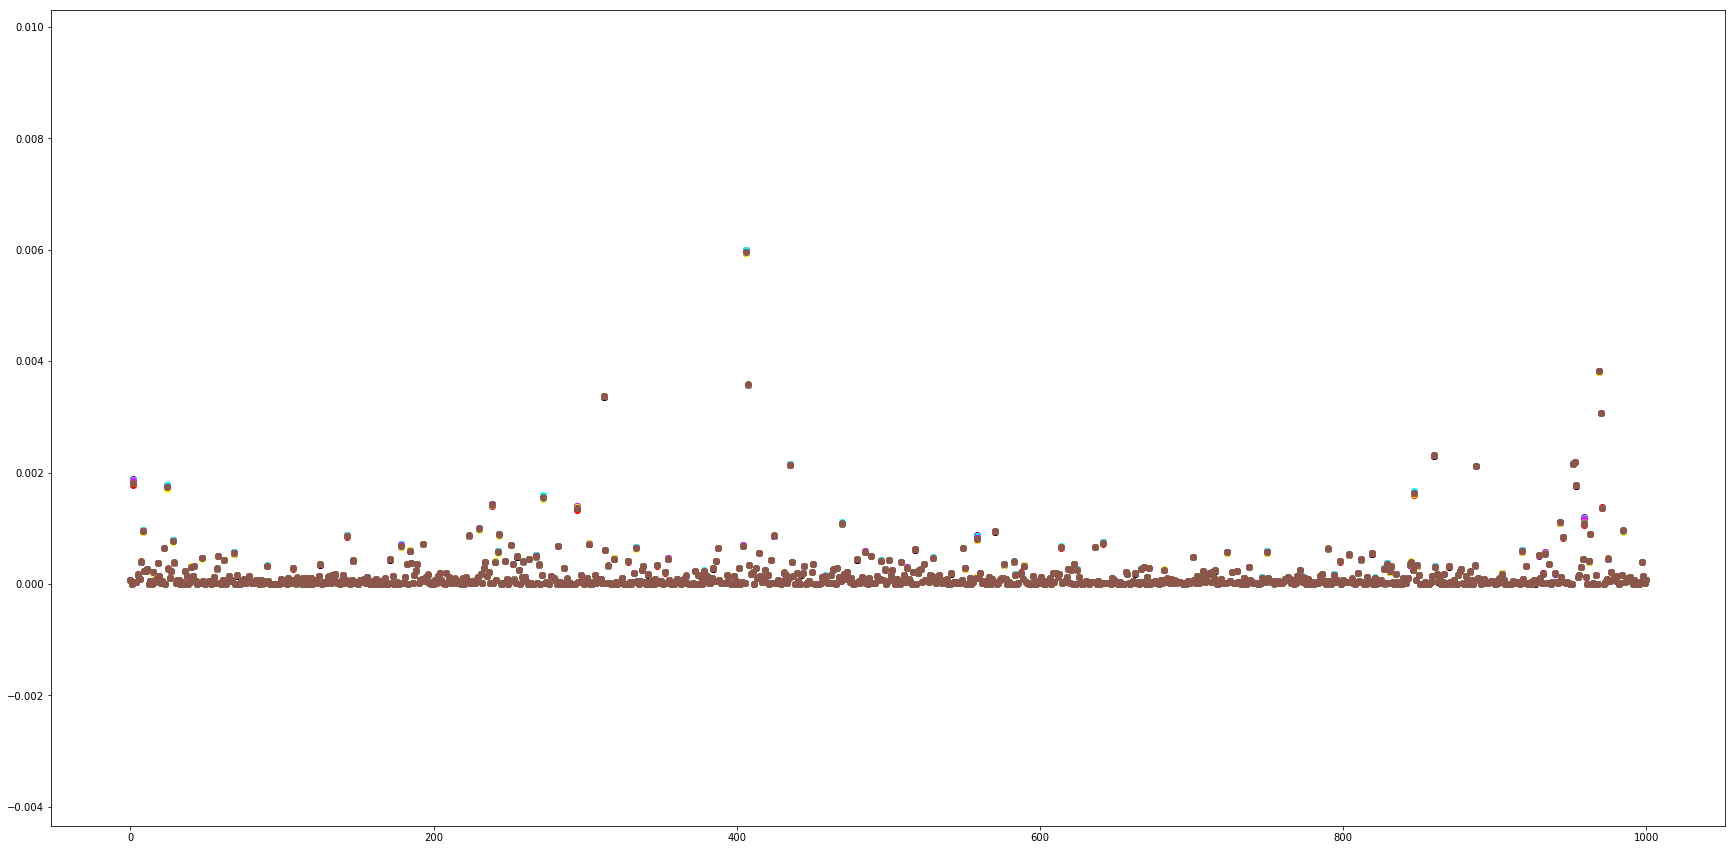

In [18]:
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'black', 'magenta', 'yellow', 'tab:gray', 'tab:brown']
fig, ax = plt.subplots(figsize=(30, 15))
x = np.linspace(0, len(mse_p1[0]), len(mse_p1[0]))
for i, col in enumerate(colors):
    ax.scatter(x, mse_p1[i], color=col)
plt.show()

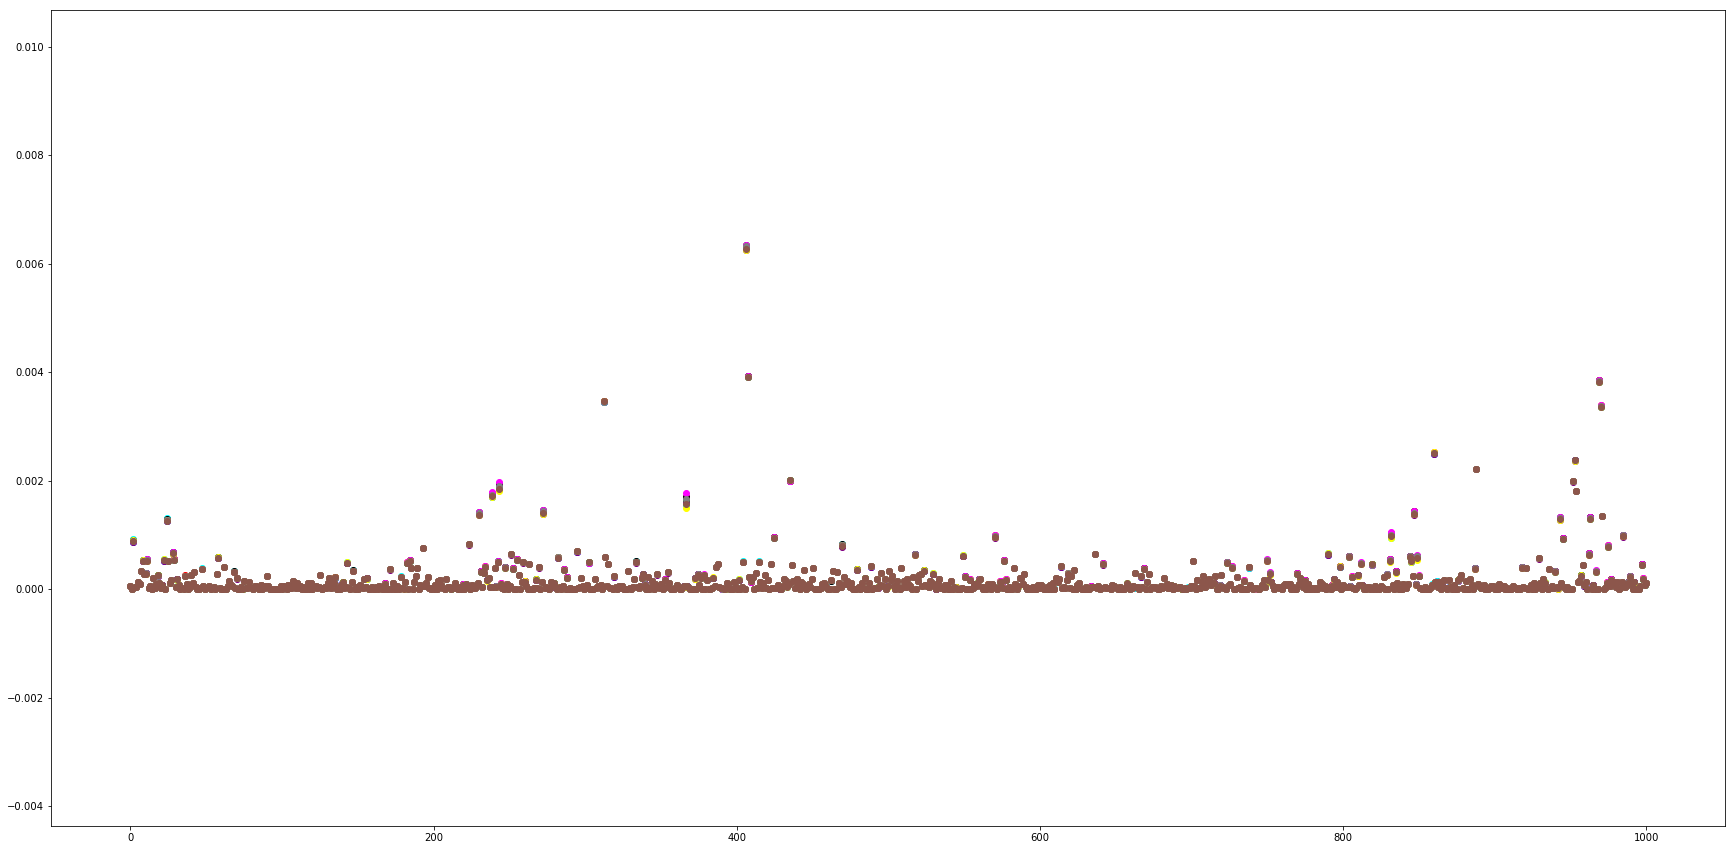

In [23]:
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'black', 'magenta', 'yellow', 'tab:gray', 'tab:brown']
fig, ax = plt.subplots(figsize=(30, 15))
x = np.linspace(0, len(mse_bis1[0]), len(mse_bis1[0]))
for i, col in enumerate(colors):
    ax.scatter(x, mse_bis1[i], color=col)
plt.show()

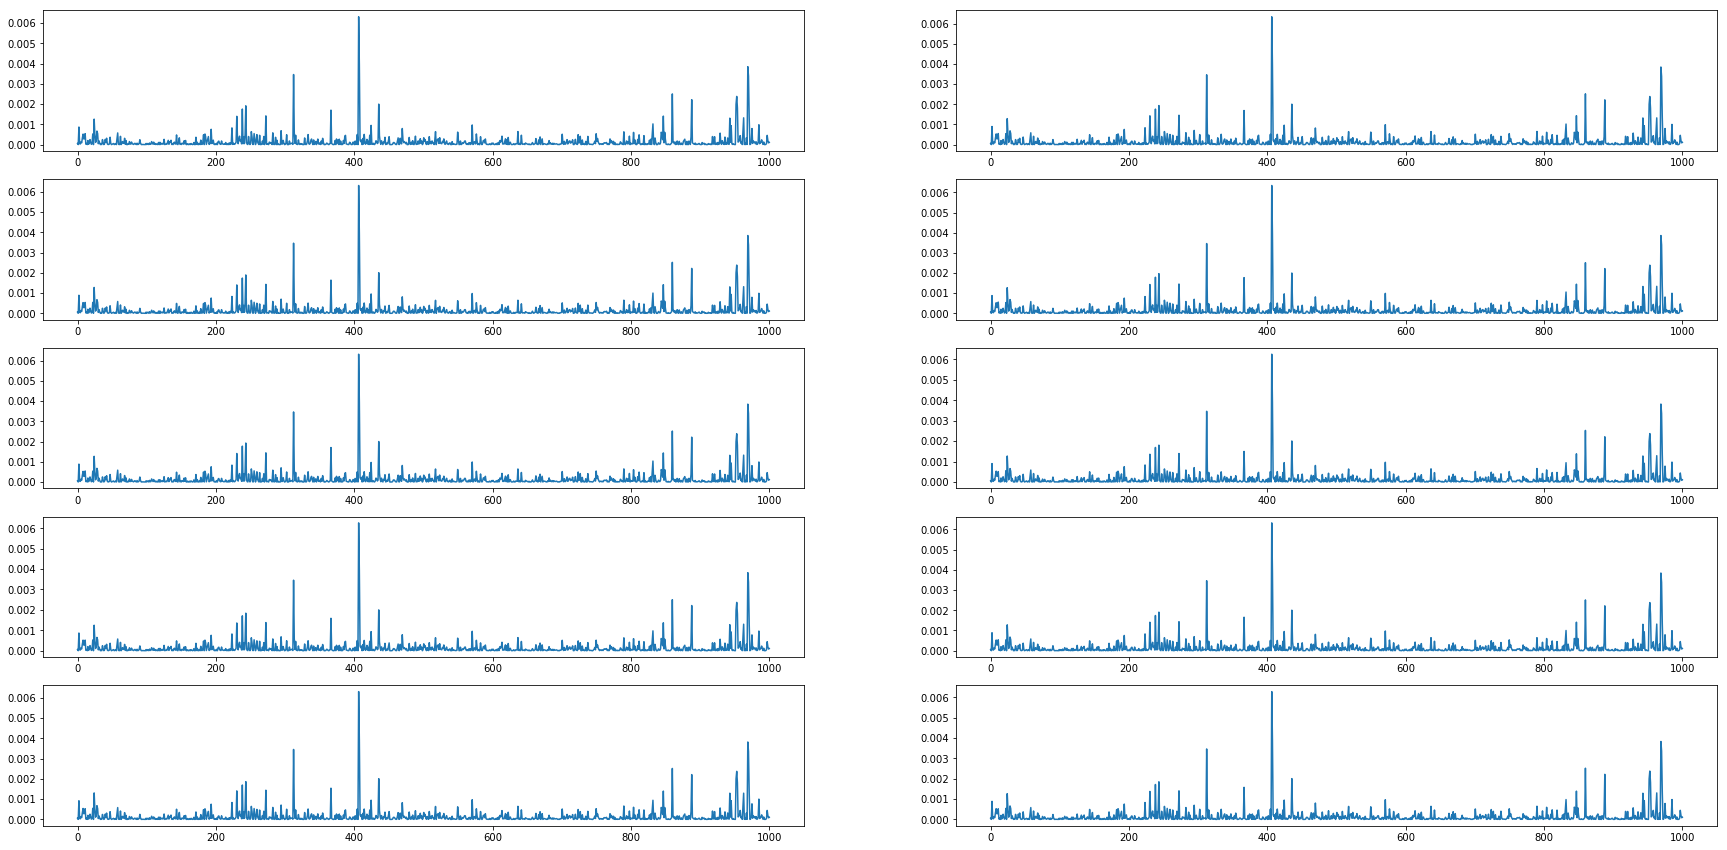

In [24]:
fig, ax = plt.subplots(5,2,figsize=(30, 15))
x = np.linspace(0, len(mse_bis1[0]), len(mse_bis1[0]))
for i, mse in enumerate(mse_bis1):
    if i<5:
        ax[i,0].plot(x, mse)
    else:
        ax[i-5,1].plot(x, mse)
plt.show()

#### comparison of generated observations

In [52]:
observations_bis = []
for i in range(1,11):
    path_BIS1_obs = os.path.join(path, "{}".format(i), BIS_1_path, "generated_observations.npy")
    obs = np.load(path_BIS1_obs)
    observations_bis.append(obs)

In [55]:
true_observations = np.load("../data/GE_observations.npy")

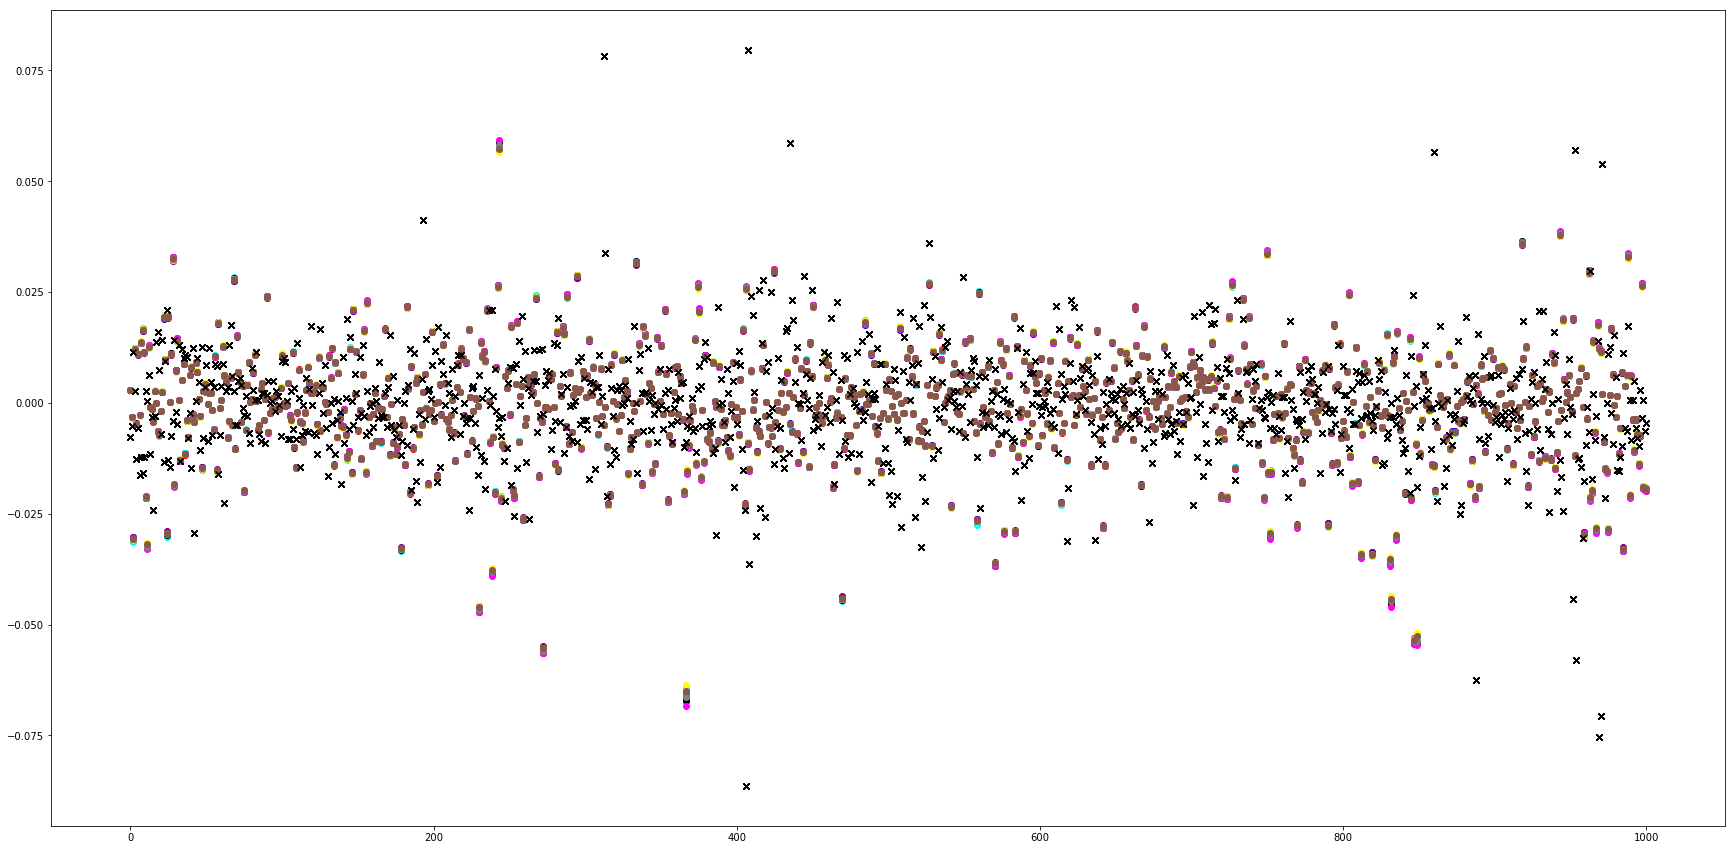

In [56]:
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'black', 'magenta', 'yellow', 'tab:gray', 'tab:brown']
fig, ax = plt.subplots(figsize=(30, 15))
x = np.linspace(0, len(observations_bis[0]), len(observations_bis[0]))
for i, col in enumerate(colors):
    ax.scatter(x, observations_bis[i], color=col)
    ax.scatter(x, true_observations, marker='x', color='black')
plt.show()

In [57]:
observations_pms = []
for i in range(1,11):
    path_PMS1_obs = os.path.join(path, "{}".format(i), PMS_1_path, "generated_observations.npy")
    obs = np.load(path_PMS1_obs)
    observations_pms.append(obs)

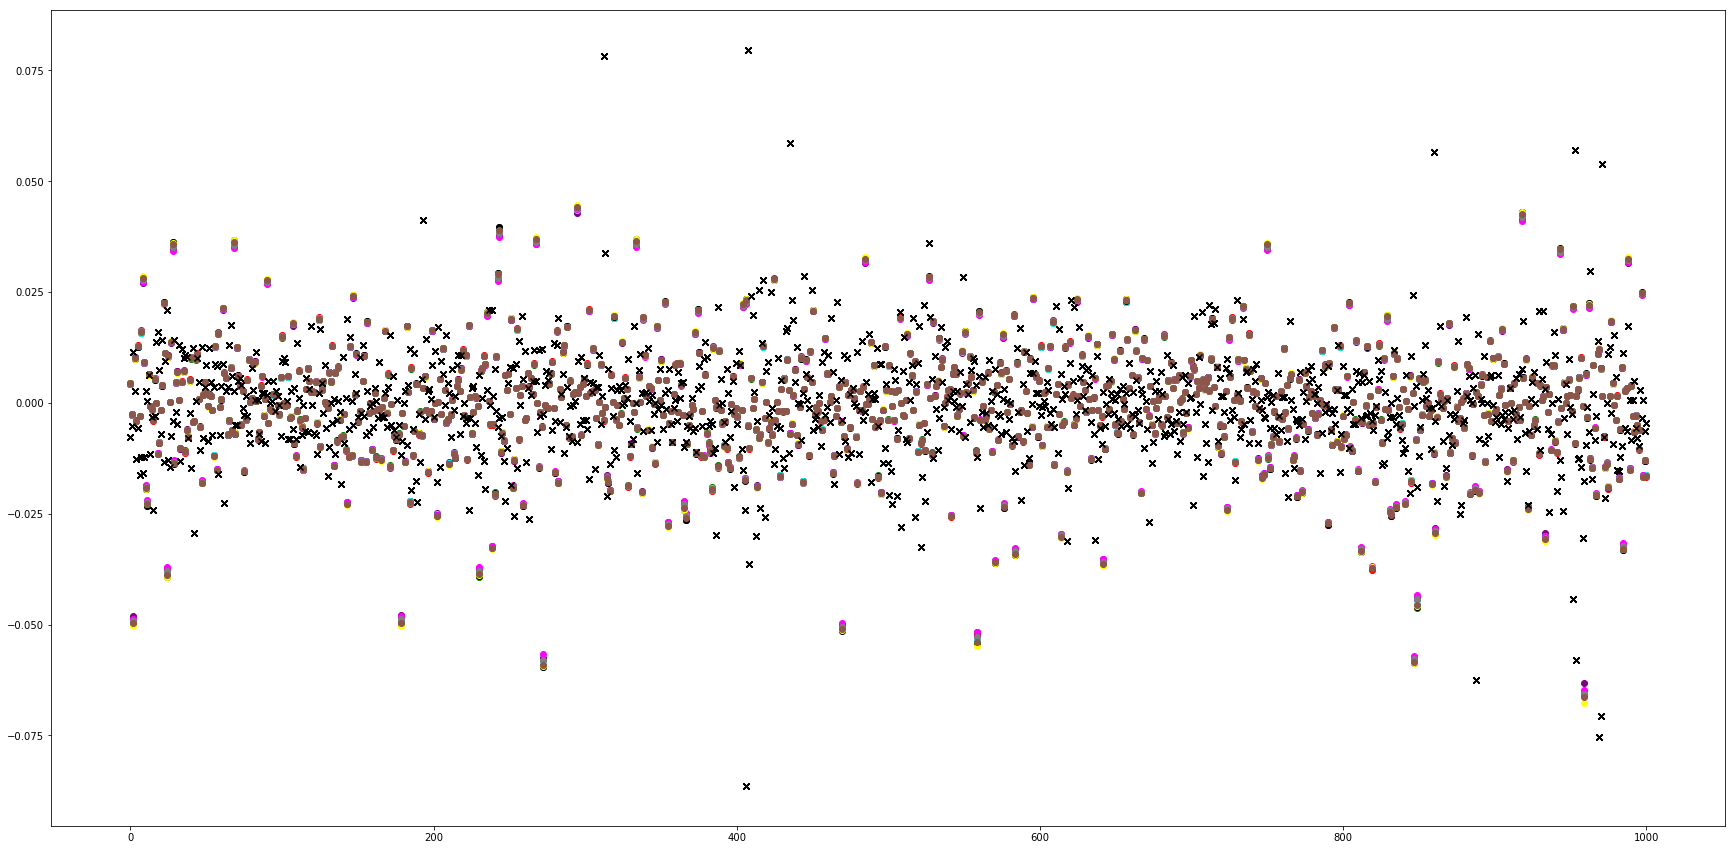

In [58]:
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'black', 'magenta', 'yellow', 'tab:gray', 'tab:brown']
fig, ax = plt.subplots(figsize=(30, 15))
x = np.linspace(0, len(observations_pms[0]), len(observations_pms[0]))
for i, col in enumerate(colors):
    ax.scatter(x, observations_pms[i], color=col)
    ax.scatter(x, true_observations, marker='x', color='black')
plt.show()